<a href="https://colab.research.google.com/github/ThBraum/SleepStudy-DataScience/blob/main/SleepStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
sst = pd.read_csv('SleepStudyData.csv')
sst.head()
sst.shape

(104, 6)

In [ ]:
sst = sst.replace(np.NaN, 0)
sst.replace(('Yes', 'No'), (1, 0), inplace=True)
sst.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1,8.0,1,1,3,1
1,0,6.0,1,1,3,0
2,1,6.0,1,1,2,1
3,0,7.0,1,1,4,0
4,0,7.0,1,1,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


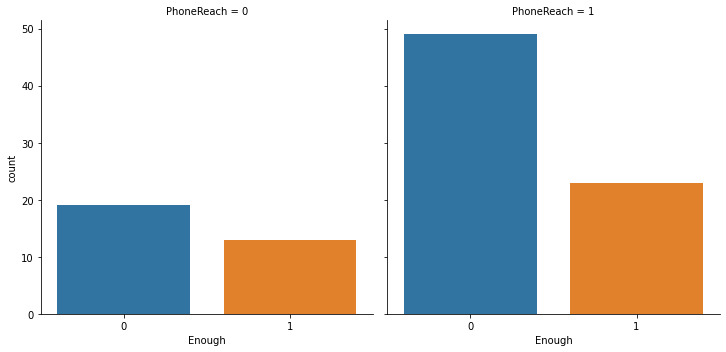

In [ ]:
sns.factorplot(x='Enough', col='PhoneReach', kind='count', data=sst)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


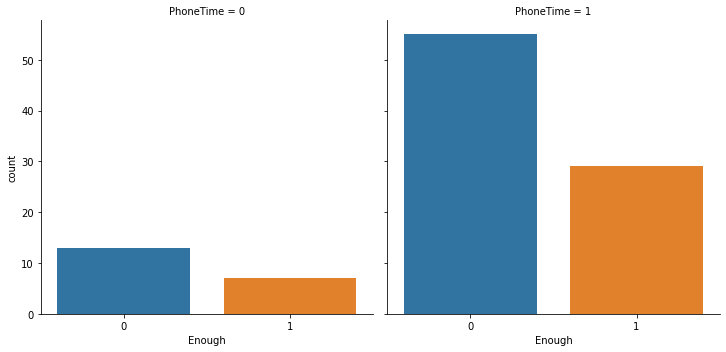

In [ ]:
sns.factorplot(x='Enough', col='PhoneTime', kind='count', data=sst)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


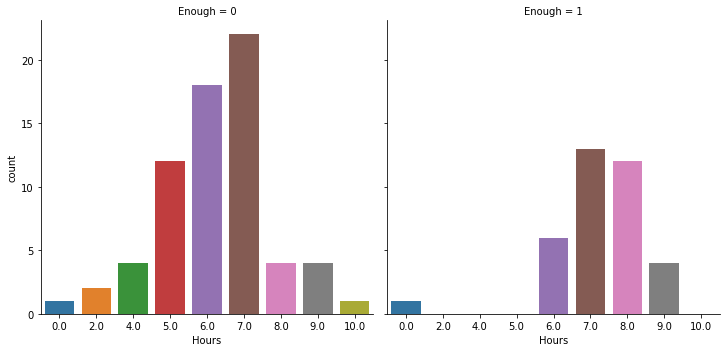

In [ ]:
sns.factorplot(x='Hours', col='Enough', kind='count', data=sst)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


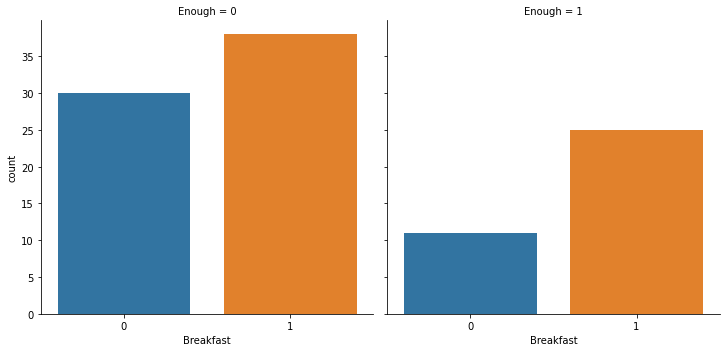

In [ ]:
sns.factorplot(x='Breakfast', col='Enough', kind='count', data=sst)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


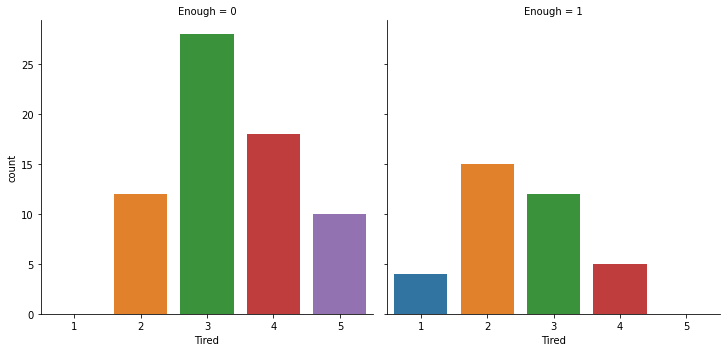

In [ ]:
sns.factorplot(x='Tired', col='Enough', kind='count', data=sst)

Naive Bayes

In [ ]:
#modelo scikit
from sklearn.naive_bayes import GaussianNB # 1 
model_bayes = GaussianNB() #2hiperparâmetro

In [ ]:
sst.columns

Index(['Enough', 'Hours', 'PhoneReach', 'PhoneTime', 'Tired', 'Breakfast'], dtype='object')

In [ ]:
#feature matrix
Xsst = sst.loc[: ,  ["Hours", "PhoneReach",	"PhoneTime", "Tired"] ] # 3.1
Xsst.head()

,Hours,PhoneReach,PhoneTime,Tired
0,8.0,1,1,3
1,6.0,1,1,3
2,6.0,1,1,2
3,7.0,1,1,4
4,7.0,1,1,2


In [ ]:
Ysst = sst.Enough # 3.2 Target array
Ysst.head()

0    1
1    0
2    1
3    0
4    0
Name: Enough, dtype: int64

In [ ]:
#separar banco de dados em banco de teste e treino
from sklearn.model_selection import train_test_split
train1, test1, train2, test2 = train_test_split(Xsst, Ysst, random_state=2020)

In [ ]:
#ajuste do modelo
model_bayes.fit(train1, train2) # 4

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#aplicação do modelo
m_bayes = model_bayes.predict(test1) # 5
m_bayes

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0])

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(test2, m_bayes)

0.7692307692307693

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decision = DecisionTreeClassifier()       # 2
                                                 # 3(Presente na Parte 1)  
model_decision.fit(train1, train2) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Decision = model_decision.predict(test1) # 5
accuracy_score(test2, Decision)

0.7692307692307693

Cross Validation/Neighbors

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, Xsst, Ysst, cv = 5)

array([0.47619048, 0.57142857, 0.66666667, 0.52380952, 0.75      ])

In [ ]:
model_bayes_cv = GaussianNB()                 # Hiperparâmetros e Instanciação
cross_val_score(model_bayes_cv, Xsst, Ysst, cv = 5)

array([0.52380952, 0.66666667, 0.80952381, 0.85714286, 0.75      ])

Leave one out

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_bayes_cv, Xsst, Ysst, cv=LeaveOneOut())
scores.mean()

0.7403846153846154

Text(83.40000000000006, 0.5, 'Valores Reais')

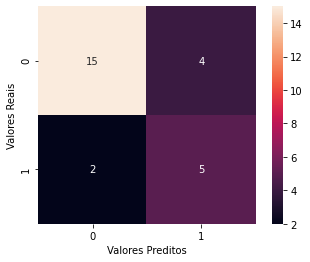

In [ ]:
from sklearn.metrics import confusion_matrix
mat_bayes = confusion_matrix(test2, m_bayes)
sns.heatmap(mat_bayes, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier   #1
classifier_rf = RandomForestClassifier(random_state=1986, criterion='gini',
                                       max_depth=10, n_estimators=50,
                                       n_jobs=-1
                                       )   #2

In [ ]:
scores = cross_val_score(classifier_rf, train1, train2,
                         scoring='accuracy', cv=5)
scores.mean()

0.7291666666666667

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
standardScaler = StandardScaler()
svm = SVC(kernel="linear", C = 0.1)

pipeline = Pipeline([('transformer', standardScaler), ('predictor', svm)])

scores = cross_val_score(pipeline, Xsst, Ysst, cv=10, scoring="accuracy")
scores

array([0.63636364, 0.63636364, 0.81818182, 1.        , 0.8       ,
       0.6       , 0.9       , 0.9       , 0.8       , 0.7       ])

In [ ]:
scores.mean()

0.7790909090909091

In [ ]:
C_range = np.logspace(-2, 3, 8)
C_scores = []

In [ ]:
for C in C_range :
  svm = SVC(kernel="linear", C=C)
  standardScaler = StandardScaler()
  pipeline = Pipeline([('transformer', standardScaler), ('predictor', svm)])
  score = cross_val_score(pipeline, Xsst, Ysst, cv=10, scoring="accuracy")
  C_scores.append(score.mean())

print(C_range)
print(C_scores)

[1.00000000e-02 5.17947468e-02 2.68269580e-01 1.38949549e+00
 7.19685673e+00 3.72759372e+01 1.93069773e+02 1.00000000e+03]
[0.6545454545454545, 0.7690909090909092, 0.7518181818181818, 0.7427272727272728, 0.7527272727272727, 0.7627272727272728, 0.7527272727272728, 0.7527272727272727]


Grid-Search

In [ ]:
from sklearn.model_selection import GridSearchCV # Mais eficiente

In [ ]:
C_range = np.logspace(-2, 3, 8)

param_grid = dict(predictor__C = C_range)
print(param_grid)

{'predictor__C': array([1.00000000e-02, 5.17947468e-02, 2.68269580e-01, 1.38949549e+00,
       7.19685673e+00, 3.72759372e+01, 1.93069773e+02, 1.00000000e+03])}


In [ ]:
standardScaler = StandardScaler()
svm = SVC(kernel="linear", C=0.1)
pipeline = Pipeline([('transformer', standardScaler), ('predictor', svm)])
grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid.fit(Xsst, Ysst)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('predictor',
                                        SVC(C=0.1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                      

In [ ]:
grid.cv_results_["mean_test_score"]

array([0.65454545, 0.76909091, 0.75181818, 0.74272727, 0.75272727,
       0.76272727, 0.75272727, 0.75272727])

In [ ]:
grid.cv_results_["params"]

[{'predictor__C': 0.01},
 {'predictor__C': 0.05179474679231213},
 {'predictor__C': 0.2682695795279726},
 {'predictor__C': 1.3894954943731375},
 {'predictor__C': 7.196856730011521},
 {'predictor__C': 37.27593720314942},
 {'predictor__C': 193.06977288832496},
 {'predictor__C': 1000.0}]

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#grid.predict()

0.7690909090909092
{'predictor__C': 0.05179474679231213}
Pipeline(memory=None,
         steps=[('transformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('predictor',
                 SVC(C=0.05179474679231213, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


Random-Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Criar pipeline
standardScaler = StandardScaler()
svm = SVC(kernel="rbf", C = 0.1, gamma = 0.1)
pipeline = Pipeline([('transformer', standardScaler), 
                     ('predictor', svm)])

# Definir intervalo de valores
param_dist = dict(
    predictor__gamma = np.logspace(-3, 3, 8),
    predictor__C     = np.logspace(-2, 3, 8)
)

rand = RandomizedSearchCV(pipeline, param_dist, cv=10, 
                          n_iter = 10, random_state = 2020,
                          scoring='accuracy')
rand.fit(Xsst, Ysst)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('transformer',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('predictor',
                                              SVC(C=0.1, break_ties=False,
                                                  cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma=0.1,
                                                  kernel='rbf', max_iter=-1,
                                                  probability=False,
                                        

In [ ]:
rand.cv_results_["mean_test_score"]

array([0.65454545, 0.68454545, 0.70454545, 0.67363636, 0.65454545,
       0.72090909, 0.77909091, 0.72090909, 0.65454545, 0.69272727])

In [ ]:
print(rand.best_score_)
print(rand.best_params_)

0.7790909090909091
{'predictor__gamma': 0.0071968567300115215, 'predictor__C': 7.196856730011521}


Comparando com o GridSearch

In [ ]:
grid = GridSearchCV(pipeline, param_grid=param_dist, 
                    cv = 10, scoring = "accuracy")
grid.fit(Xsst, Ysst)
grid.cv_results_['mean_test_score']

array([0.65454545, 0.65454545, 0.65454545, 0.65454545, 0.65454545,
       0.65454545, 0.65454545, 0.65454545, 0.65454545, 0.65454545,
       0.65454545, 0.65454545, 0.65454545, 0.65454545, 0.65454545,
       0.65454545, 0.65454545, 0.65454545, 0.65454545, 0.65454545,
       0.64454545, 0.64454545, 0.64454545, 0.64454545, 0.65454545,
       0.65454545, 0.76      , 0.69454545, 0.69363636, 0.72090909,
       0.72090909, 0.72090909, 0.65454545, 0.77909091, 0.71363636,
       0.67454545, 0.67363636, 0.72090909, 0.72090909, 0.72090909,
       0.78818182, 0.73181818, 0.70454545, 0.69272727, 0.67363636,
       0.72090909, 0.72090909, 0.72090909, 0.74181818, 0.68454545,
       0.66454545, 0.70181818, 0.67363636, 0.72090909, 0.72090909,
       0.72090909, 0.73272727, 0.72363636, 0.66363636, 0.70181818,
       0.67363636, 0.72090909, 0.72090909, 0.72090909])

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7881818181818183
{'predictor__C': 37.27593720314942, 'predictor__gamma': 0.001}
